In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import load_digits

In [4]:
digits = load_digits()

In [5]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [6]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [7]:
plt.gray()

<Figure size 432x288 with 0 Axes>

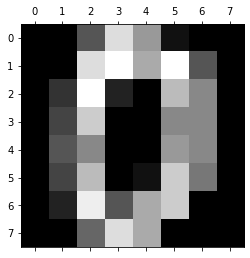

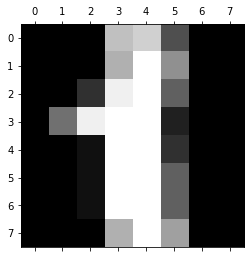

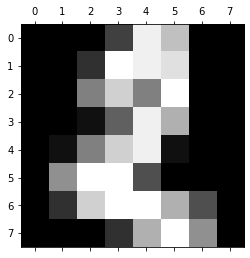

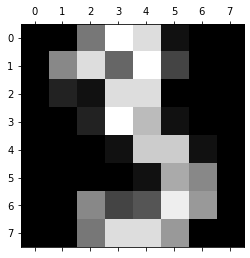

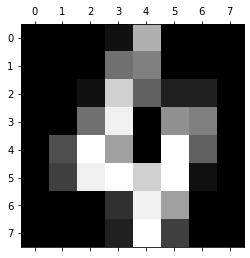

In [8]:
for i in range(5):
    plt.matshow(digits.images[i])

In [9]:
digits.target[0:5]

array([0, 1, 2, 3, 4])

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train , X_test , y_train , y_test = train_test_split(digits.data,digits.target,test_size=0.2)

In [12]:
len(X_train)

1437

In [13]:
len(X_test)

360

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
model = LogisticRegression()

In [16]:
model.fit(X_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [17]:
model.score(X_test,y_test)

0.9555555555555556

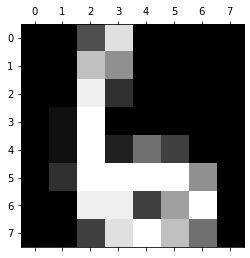

In [18]:
plt.matshow(digits.images[67])

In [19]:
digits.target[67]

6

In [20]:
model.predict([digits.data[67]])

array([6])

In [21]:
model.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

In [22]:
from sklearn.metrics import confusion_matrix

In [23]:
y_predicted = model.predict(X_test)

In [24]:
a = confusion_matrix(y_test,y_predicted)

In [25]:
a

array([[33,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 33,  0,  1,  0,  0,  0,  0,  2,  1],
       [ 0,  0, 38,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 30,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0, 44,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1, 34,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  1, 35,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 38,  0,  1],
       [ 0,  2,  0,  0,  1,  1,  0,  0, 24,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  2, 35]])

In [26]:
import seaborn as sns

Text(69.0, 0.5, 'Truth')

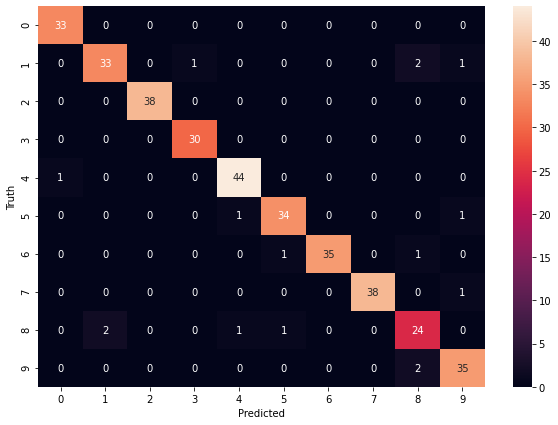

In [27]:
plt.figure(figsize = (10,7))
sns.heatmap(a,annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')